In [21]:
from synaptics import *
import matplotlib.pyplot as plt

In [354]:
layer = IzhikevichLayer(size=2, preset='RS', resolution=1)
layer1 = IzhikevichLayer(size=2, preset='RS', resolution = 1)
synapse = Synapse(layer, layer1, tau=30)

In [355]:
a = [5, 9]
b = [9, 5]
synapse.weights *= 0
synapse.weights += .5

In [371]:
w00 = []
w01 = []
w10 = []
w11 = []
v00 = []
v01 = []
v10 = []
v11 = []
layer.transmitter_impact = 25

for i in range(8):
    if i%2 == 0:
        layer.apply_current(a)
        idx = 1
    else:
        layer.apply_current(b)
        idx = 0
    for i in range(80):
        synapse.forward()
        
        #layer1.I[idx] += 10
        layer1.forward()
        #synapse.STDP(learning_rate=.01, assymetry=2.5)

        v00.append(layer.impulses[0])
        v01.append(layer.impulses[1])
        v10.append(layer1.impulses[0])
        v11.append(layer1.impulses[1])
        w00.append(synapse.weights[0,0])
        w01.append(synapse.weights[0,1])
        w10.append(synapse.weights[1,0])
        w11.append(synapse.weights[1,1])

In [369]:
for i in range(10000):
    layer.dynamics()
    layer1.dynamics()

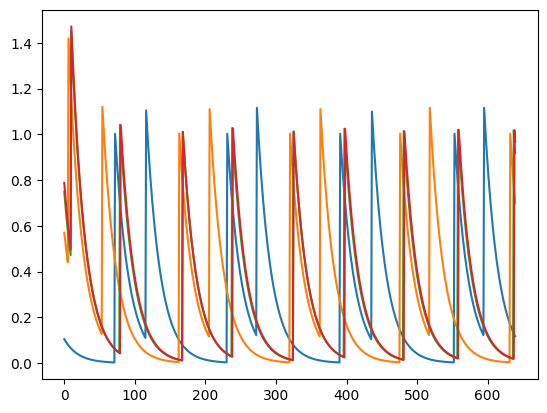

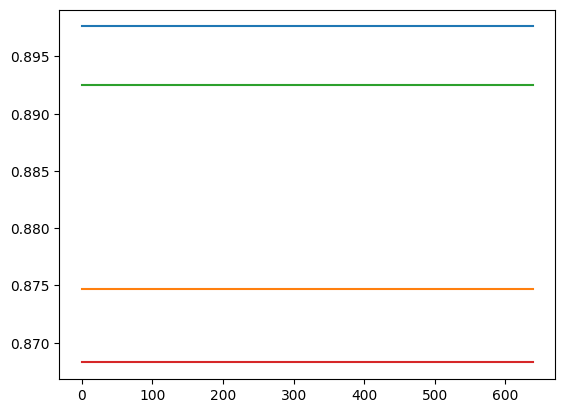

In [372]:
plt.plot(v00)
plt.plot(v01)
plt.plot(v10)
plt.plot(v11)
plt.show()
plt.plot(w00)
plt.plot(w01)
plt.plot(w10)
plt.plot(w11)
plt.show()